# Multimodal Rigid Registration

The method used here works as follows: 
+ Resize images for faster feature computation
+ Compute mean phase images
+ Find HOG features and rotate them for one of the images
+ Find mutual matches between HOG features of one image with all rotations of the HOG features of the other image
+ Estimate AffineTransformation using RANSAC
+ Warp and return the image

Unfortunatelly we currently have no multimodal fundus images which we could show here. Hence we distorted one of skimages example images here.

The implementation loosely follows the first part of the method described in "Multi-modal and multi-vendor retina image registration" by Zhang et al. This is not a reference implementation. Some of the differences are:

+ We do not use approximate nearest neighbours for feature matching instead we do a brute force matching
+ We use larger cells (10 by 10 pixels) for the HOG descriptors and less cells per block (5 by 5 cells).
+ Rotation of the HOG features was not described in the original publication but is necessary to find useful matches when the images are not rotated the same.

In [1]:
import eyepy as ep
import skimage as ski
import matplotlib.pyplot as plt

tform = ski.transform.AffineTransform(scale=(0.9,0.8), rotation=2/11,
                           translation=(0, -100))

img1 = ski.color.rgb2gray(ski.data.astronaut())
img2 = abs(ski.transform.warp(img1, tform) -0.5)

reg_img2, model = ep.register.rigid_multimodal(img2, img1)

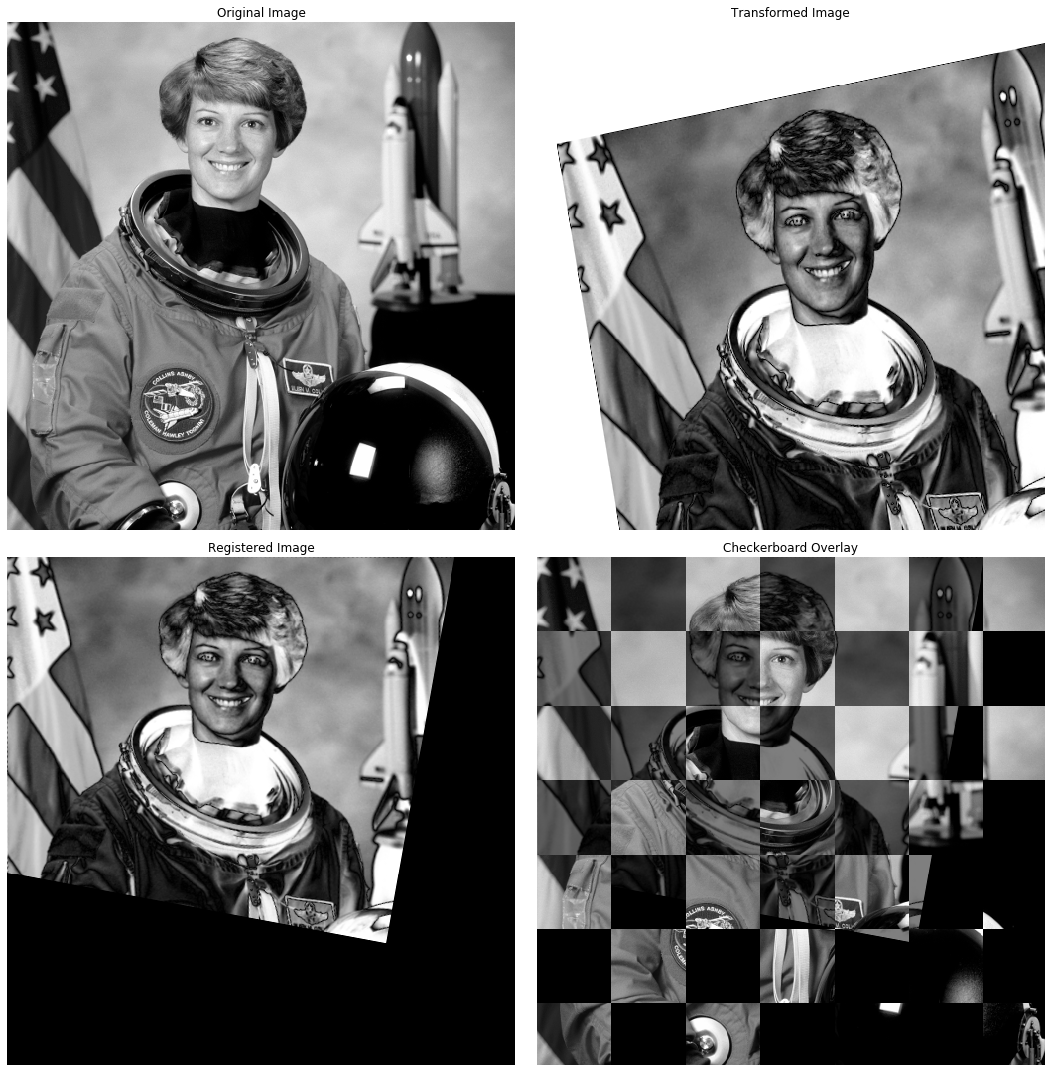

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))

for ax in [ax1, ax2, ax3, ax4]:
    ax.axis('off')
    
ax1.imshow(img1, cmap="gray")

ax2.imshow(img2, cmap="gray")
ax3.imshow(reg_img2, cmap="gray")
ep.register.registration_comparison(ax4, img1, reg_img2, square_size=75)


ax1.set_title("Original Image")
ax2.set_title("Transformed Image")
ax3.set_title("Registered Image")
ax4.set_title("Checkerboard Overlay")
plt.tight_layout()